# Netflix Top Ten

Analysis thus far has been focused on box office data. However, due to the COVID-19 pandemic, this analysis does not take into account most recent trends in viewership. Because we cannot accurately rely on box office data for 2020 and 2021, we will need to instead look for data from a different source--streaming. Most streaming services do not release comprehensive ratings for their programming, but we can use data gathered from Netflix's "Top Ten" feature to get a glimpse into the most recent viewership trends.
Netflix Top Ten data was collected from the-numbers.com and aggregates all titles that have appeared in the Netflix Top Ten from January 1st to May 31st 2021. Additional details about these titles was collected from TMDB.

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import dataset
df = pd.read_csv('data/Edited Data/Netflix Top Ten with Info.csv', converters={'genre_ids': eval})
genres = pd.read_csv('data/edited data/tmdb genres.csv')

In [2]:
#prepare table for plotting
#assemble only columns relevant to the visualization
movie_genres = df.loc[:, ['Title', 'genre_ids', 'Viewership Score', 'Type']]

#filter out TV shows
movie_genres = movie_genres.loc[movie_genres['Type'] == 'Movie']

#expand list of genre ids
movie_genres = movie_genres.explode('genre_ids')

#merge in genre names
graph = movie_genres.merge(genres, left_on='genre_ids', right_on='id')

## Plotting Genres

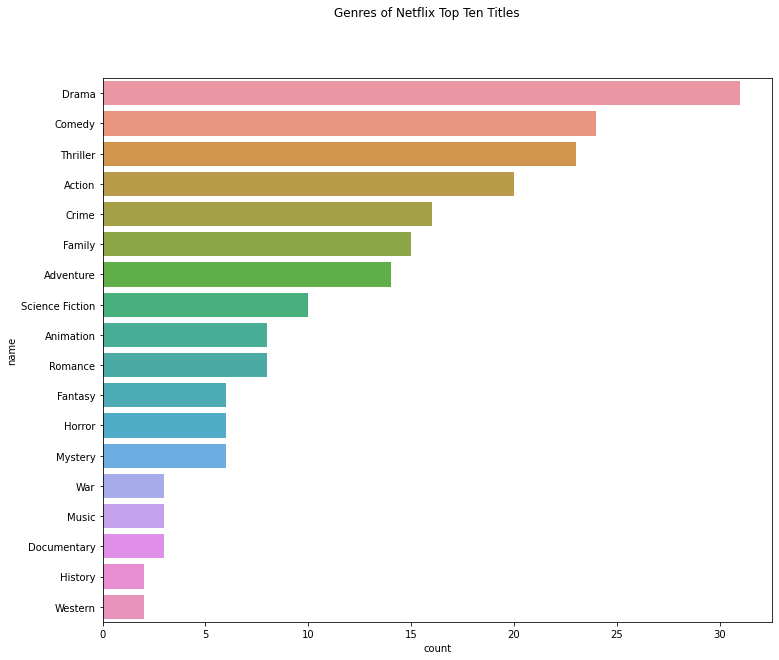

In [3]:
#create plot
fig = plt.figure(figsize=(12,10))
fig.suptitle('Genres of Netflix Top Ten Titles')
plt.xlabel('Count')
plt.ylabel('Genres')
sns.countplot(data=graph, y='name', order = graph['name'].value_counts().index);

We can see from this graph that dramas are the most popular genre, followed by comedy and thriller. Let's examine these genres to see if we can find some commonalities.

## Dramas

In [5]:
dramas = movie_genres.loc[movie_genres['genre_ids'] == 18]
drama_details = dramas.merge(df, on='Title')
drama_details.drop(columns=['genre_ids_x', 'Type_x', 'Type_y', 'Viewership Score_y', 'first_air_date', 'id', 'media_type', 'name', 'origin_country'], inplace=True)
drama_details.head()

,Title,Viewership Score_x,Netflix Release Date,Days in Top Ten,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date
0,Deadly Illusions,82,18-Mar-21,10,"[18, 53]",en,"A bestselling female novelist, suffering from ...",38.894,5.0,185,3/18/2021
1,The Midnight Sky,82,23-Dec-20,10,"[878, 18]",en,A lone scientist in the Arctic races to contac...,19.914,5.9,1264,12/10/2020
2,Stowaway,70,22-Apr-21,9,"[18, 878, 53]",en,A three-person crew on a mission to Mars faces...,92.590,6.0,565,4/22/2021
3,Synchronic,64,16-Apr-21,9,"[878, 18, 53, 27]",en,Two New Orleans paramedics' lives are ripped a...,18.423,6.5,261,10/23/2020
4,Concrete Cowboy,60,2-Apr-21,10,"[18, 37]",en,Sent to live with his estranged father for the...,19.855,6.3,80,9/10/2020


In [7]:
#print synopsis for the first ten titles in the dataframe
for i in list(drama_details['overview'][:10]):
    print(i)
    print('\n')

A bestselling female novelist, suffering from writer's block, hires an innocent young woman to watch over her twin children. As the novelist dangerously indulges in her new best seller, the line between the life she's writing and the one she's living becomes blurred.


A lone scientist in the Arctic races to contact a crew of astronauts returning home to a mysterious global catastrophe.


A three-person crew on a mission to Mars faces an impossible choice when an unplanned passenger jeopardizes the lives of everyone on board.


Two New Orleans paramedics' lives are ripped apart after encountering a series of horrific deaths linked to a designer drug with bizarre, otherworldly effects.


Sent to live with his estranged father for the summer, a rebellious teen finds kinship in a tight-knit Philadelphia community of Black cowboys.


Pot growers Ben and Chon face off against the Mexican drug cartel who kidnapped their shared girlfriend.


A married couple's life is turned upside down when 

Briefly examining the synopses for the ten most popular dramas, isolation is a recurring theme. That makes a lot of sense when you consider the isolation we have all been dealing with during the pandemic — but because this theme is so tied to current events, this could also indicate that as pandemic restrictions continue to ease, these stories about isolation will become less popular. We can examine the genre_ids column to see what genres occur most frequently in conjunction with drama.

In [8]:
#define a function that counts the frequency of genres in the genre_id column
def genre_count(series):
    g = []
    genres = {}
    for i in series:
        g.extend(i)
    x = list(set(g))
    for i in x:
        genres[i] = 0
    for i in g:
        genres[i] += 1
    return genres

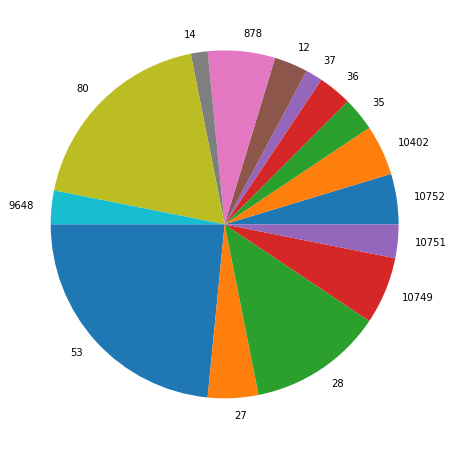

In [22]:
drama_chart = genre_count(drama_details['genre_ids_y'])
drama_chart.pop(18)
fig = plt.figure(figsize=(8,8))
plt.pie(drama_chart.values(), labels = drama_chart.keys());

In [23]:
#What genre is id 53?
genres.loc[(genres['id'] == 53) | (genres['id'] == 80) | (genres['id'] == 28)]

,id,name
0,28,Action
4,80,Crime
16,53,Thriller


Thriller is another of our most popular genres, and it pairs reasonably frequently with drama. Action and crime movies are also frequent.

## Comedy

In [25]:
comedies = movie_genres.loc[movie_genres['genre_ids'] == 35]
comedy_details = comedies.merge(df, on='Title')
comedy_details.drop(columns=['genre_ids_x', 'Type_x', 'Type_y', 'Viewership Score_y', 'first_air_date', 'id', 'media_type', 'name', 'origin_country'], inplace=True)
comedy_details.head()

,Title,Viewership Score_x,Netflix Release Date,Days in Top Ten,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date
0,The Mitchells vs. the Machines,204,30-Apr-21,31,"[16, 12, 35, 10751, 878]",en,"A quirky, dysfunctional family's road trip is ...",121.520,8.0,859,4/22/2021
1,We Can Be Heroes,144,25-Dec-20,24,"[28, 14, 10751, 35]",en,When alien invaders capture Earth's superheroe...,176.566,6.3,483,12/25/2020
2,Yes Day,126,12-Mar-21,15,"[35, 10751]",en,A mom and dad who usually say no decide to say...,128.535,7.0,572,3/12/2021
3,Thunder Force,112,9-Apr-21,16,"[28, 12, 35]",en,In a world where supervillains are commonplace...,475.745,5.8,621,4/9/2021
4,I Care a Lot,103,19-Feb-21,15,"[35, 80, 53]",en,A court-appointed legal guardian defrauds her ...,98.503,6.7,1446,2/19/2021


In [26]:
for i in list(comedy_details['overview'][:10]):
    print(i)
    print('\n')

A quirky, dysfunctional family's road trip is upended when they find themselves in the middle of the robot apocalypse and suddenly become humanity's unlikeliest last hope.


When alien invaders capture Earth's superheroes, their kids must learn to work together to save their parents - and the planet.


A mom and dad who usually say no decide to say yes to their kids' wildest requests — with a few ground rules — on a whirlwind day of fun and adventure.


In a world where supervillains are commonplace, two estranged childhood best friends reunite after one devises a treatment that gives them powers to protect their city.


A court-appointed legal guardian defrauds her older clients and traps them under her care. But her latest mark comes with some unexpected baggage.


Two pals embark on a road trip full of funny pranks that pull real people into mayhem.


Two Brooklyn siblings' summer in a rural Oahu town takes an exciting turn when a journal pointing to long-lost treasure sets them on 

Where isolation was a recurring theme in the drama category, family is an even stronger theme amongst the comedies. This observation leads me to assume that "Family" will be a key co-occurring genre with comedies.

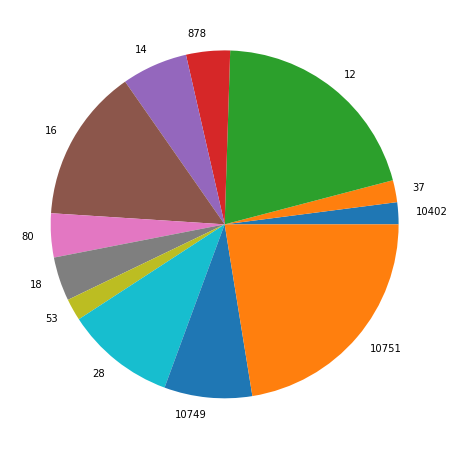

In [27]:
comedy_chart = genre_count(comedy_details['genre_ids_y'])
comedy_chart.pop(35)
fig = plt.figure(figsize=(8,8))
plt.pie(comedy_chart.values(), labels = comedy_chart.keys());

In [24]:
genres.loc[(genres['id'] ==12) | (genres['id'] ==10751)]

,id,name
1,12,Adventure
7,10751,Family


This is, in fact, the case. Two genres that commonly occur with "comedy" are "Family" and "Adventure"

## Thriller

In [28]:
thriller = movie_genres.loc[movie_genres['genre_ids'] == 53]
thriller_details = thriller.merge(df, on='Title')
thriller_details.drop(columns=['genre_ids_x', 'Type_x', 'Type_y', 'Viewership Score_y', 'first_air_date', 'id', 'media_type', 'name', 'origin_country'], inplace=True)
thriller_details.head()

,Title,Viewership Score_x,Netflix Release Date,Days in Top Ten,genre_ids_y,original_language,overview,popularity,vote_average,vote_count,release_date
0,I Care a Lot,103,19-Feb-21,15,"[35, 80, 53]",en,A court-appointed legal guardian defrauds her ...,98.503,6.7,1446,2/19/2021
1,The Woman in the Window,100,14-May-21,11,"[80, 9648, 53]",en,An agoraphobic woman living alone in New York ...,142.646,6.2,804,5/14/2021
2,Army of the Dead,89,21-May-21,10,"[28, 27, 53]",en,"Following a zombie outbreak in Las Vegas, a gr...",2615.629,6.6,1290,5/14/2021
3,Deadly Illusions,82,18-Mar-21,10,"[18, 53]",en,"A bestselling female novelist, suffering from ...",38.894,5.0,185,3/18/2021
4,Homefront,74,18-Jan-21,12,"[28, 53]",en,Phil Broker is a former DEA agent who has gone...,35.675,6.9,2550,11/12/2013


In [29]:
for i in list(thriller_details['overview'][:10]):
    print(i)
    print('\n')

A court-appointed legal guardian defrauds her older clients and traps them under her care. But her latest mark comes with some unexpected baggage.


An agoraphobic woman living alone in New York begins spying on her new neighbors only to witness a disturbing act of violence.


Following a zombie outbreak in Las Vegas, a group of mercenaries take the ultimate gamble: venturing into the quarantine zone to pull off the greatest heist ever attempted.


A bestselling female novelist, suffering from writer's block, hires an innocent young woman to watch over her twin children. As the novelist dangerously indulges in her new best seller, the line between the life she's writing and the one she's living becomes blurred.


Phil Broker is a former DEA agent who has gone through a crisis after his action against a biker gang went horribly wrong and it cost the life of his boss' son. He is recently widowed and is left with a 9-years-old daughter, Maddy. He decides to quit the turbulent and demandin

Unsurprisingly, several of the movies we saw in the Drama category occur in this table as well.

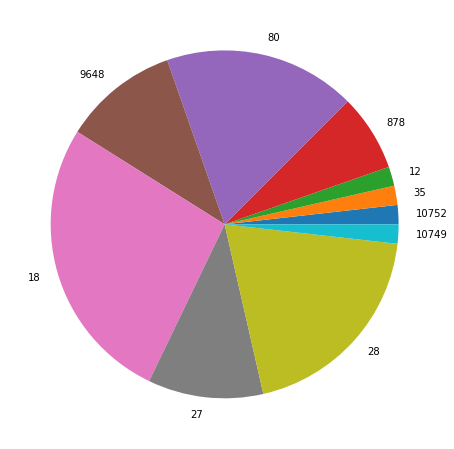

In [30]:
thriller_chart = genre_count(thriller_details['genre_ids_y'])
thriller_chart.pop(53)
fig = plt.figure(figsize=(8,8))
plt.pie(thriller_chart.values(), labels = thriller_chart.keys());

In [31]:
genres.loc[(genres['id'] == 18) | (genres['id'] == 28) | (genres['id'] == 80)]

,id,name
0,28,Action
4,80,Crime
6,18,Drama


Here we see the same four genres together again--drama, action, thriller, crime. If we look back at our chart of values, we can see that action and crime are the next two most popular genres, which reinforces that this is a potent combo right now.